In [1]:
%matplotlib notebook
import mdp
import mdp_worlds
import utils
import numpy as np
import random 
import bayesian_irl
import plot_gridworld as pg

[-0.11043153 -0.99388373]
Cliff world
Optimal Policy
v	<	<	<	<	
v	<	^	^	^	
v	<	v	v	v	
v	v	v	v	v	
>	>	>	>	.	
reward
-0.11	-0.11	-0.11	-0.11	-0.11	
-0.11	-0.99	-0.99	-0.99	-0.99	
-0.11	-0.99	-0.99	-0.99	-0.99	
-0.11	-0.99	-0.99	-0.99	-0.99	
-0.11	-0.11	-0.11	-0.11	-0.11	
features
0 	0 	0 	0 	0 	
0 	1 	1 	1 	1 	
0 	1 	1 	1 	1 	
0 	1 	1 	1 	1 	
0 	0 	0 	0 	0 	
demo 0 [(0, 3), (5, 3), (10, 3), (15, 3), (20, 1), (21, 1), (22, 1), (23, 1), (24, None)]
demonstration
[(15, 3), (21, 1), (20, 1), (24, None), (23, 1), (0, 3), (10, 3), (22, 1), (5, 3)]


/home/dsbrown/Code/cvar_irl/plot_gridworld.py:126: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<IPython.core.display.Javascript object>


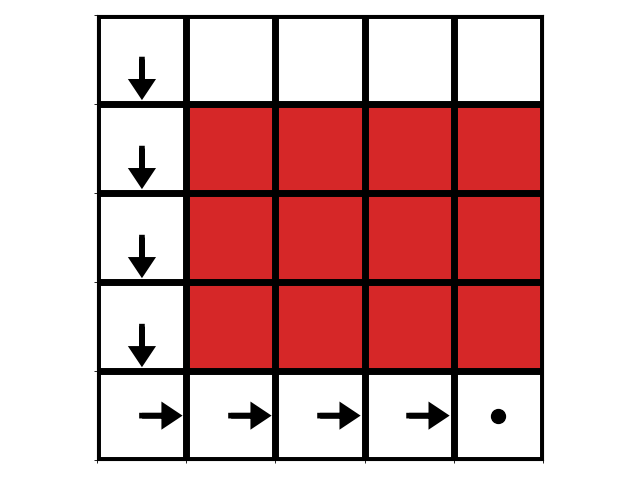

[[1, 1, 1, 1, 1], [1, 2, 2, 2, 2], [1, 2, 2, 2, 2], [1, 2, 2, 2, 2], [1, 1, 1, 1, 1]]
0
w_map [ 0.49935207 -0.86639916] loglik = -498.3738
2
w_map [ 0.40743223 -0.91323545] loglik = -408.2831
5
w_map [ 0.31274563 -0.94983692] loglik = -315.4808
6
w_map [ 0.2456797  -0.96935106] loglik = -249.7495
7
w_map [ 0.03248832 -0.99947212] loglik = -40.8007
8
w_map [-0.08945171 -0.99599116] loglik = -4.3061
17
w_map [-0.26399584 -0.96452382] loglik = -0.8356
19
w_map [-0.43580309 -0.90004204] loglik = -0.1747
25
w_map [-0.46866686 -0.88337499] loglik = -0.1373
57
w_map [-0.5080145  -0.86134852] loglik = -0.1139
67
w_map [-0.51344812 -0.85812064] loglik = -0.1126
87
w_map [-0.52200856 -0.85294024] loglik = -0.1114
234
w_map [-0.52289181 -0.85239906] loglik = -0.1114
327
w_map [-0.5238233  -0.85182695] loglik = -0.1114
333
w_map [-0.52585214 -0.850576  ] loglik = -0.1114
651
w_map [-0.52553378 -0.85077274] loglik = -0.1114
709
w_map [-0.52552951 -0.85077537] loglik = -0.1114
711
w_map [-0.52460723

<IPython.core.display.Javascript object>


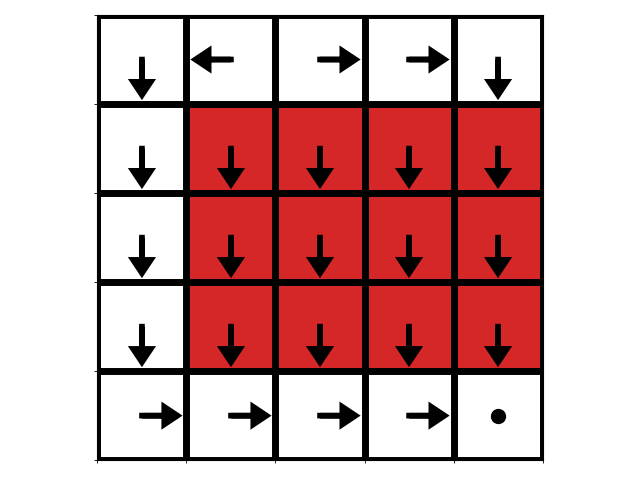

[[1, 1, 1, 1, 1], [1, 2, 2, 2, 2], [1, 2, 2, 2, 2], [1, 2, 2, 2, 2], [1, 1, 1, 1, 1]]


In [11]:
#used this to plot the diagrams in the paper currently.

init_seed = 1#4 + 10
np.random.seed(init_seed)
random.seed(init_seed)

slip_prob = 0.3
demo_horizon = 10
num_demos = 1

###BIRL
beta = 10.0
step_stdev = 0.2
burn = 500
skip = 5
num_samples = 2000
mcmc_norm = "l2"
likelihood = "birl"

mdp_env = mdp_worlds.lava_ambiguous_corridor3()
opt_sa = mdp.solve_mdp_lp(mdp_env)


print("Cliff world")
print("Optimal Policy")
utils.print_policy_from_occupancies(opt_sa, mdp_env)
print("reward")
utils.print_as_grid(mdp_env.r_s, mdp_env)
print("features")
utils.display_onehot_state_features(mdp_env)

init_demo_state = 1#mdp_env.num_cols * (mdp_env.num_rows - 1)
traj_demonstrations = []
demo_set = set()
for d in range(num_demos):
    # np.random.seed(init_seed + d)
    # random.seed(init_seed + d)
    s = init_demo_state #mdp_env.init_states[0] # only one initial state
    demo = utils.rollout_from_usa(s, demo_horizon, opt_sa, mdp_env)
    print("demo", d, demo)
    traj_demonstrations.append(demo)
    for s_a in demo:
        demo_set.add(s_a)
demonstrations = list(demo_set)
print("demonstration")
print(demonstrations)

state_feature_list = [tuple(fs) for fs in mdp_env.state_features]
pg.get_policy_string_from_trajectory(traj_demonstrations[0], state_feature_list, mdp_env, filename="./figs/lava_corridor/demo_lava_world.png")


#Now let's run Bayesian IRL on this demo in this mdp with a placeholder feature to see what happens.


birl = bayesian_irl.BayesianIRL(mdp_env, beta, step_stdev, debug=False, mcmc_norm=mcmc_norm, likelihood=likelihood)

# r_hyps = [#[0,-1],
#         [-1,0],
#         #[-0.1232111, -0.8767889],
#         #[-0.25691869, -0.74308131],
#         [-0.05609254, -0.94390746],
#         [-0.57066167,  0.42933833],
#         [-0.55, 0.45],
#         [-.1,-0.9]
#         ]

# for i,r in enumerate(r_hyps):
#     print()
#     print("TRIAL ", i)
#     #generate random rewards
#     #r = r / np.linalg.norm(r)
#     print("weights", r)
#     r_sa = mdp_env.transform_to_R_sa(r)
#     print('mean reward')
#     r_s = np.dot(mdp_env.state_features, r)
#     utils.print_as_grid(r_s, mdp_env)
    
#     occ_freqs, q_vals = birl.solve_optimal_policy(r)
#     print("Optimal Policy under weights")
#     utils.print_policy_from_occupancies(occ_freqs, mdp_env)
#     print("policy probs")
#     utils.print_stochastic_policy_action_probs(occ_freqs, mdp_env)
    
#     print(q_vals.shape)
#     print(q_vals)
#     utils.print_q_vals_pretty(q_vals, mdp_env)
#     #q_vals2 = mdp.get_q_values(occupancy_frequencies, mdp_env)
#     ll = birl.log_likelihood(r, q_vals, demonstrations)
#     print("log likelihood ", ll)

# input()
map_w, map_u, r_chain, u_chain = birl.sample_posterior(demonstrations, num_samples, True)
print(r_chain)
import matplotlib.pyplot as plt
# plt.figure()
# for w in range(len(r_chain[0])):
#     plt.plot(r_chain[:,w],label="feature {}".format(w))
# plt.legend()
# plt.show()


r_chain_burned = r_chain[burn::skip]

u_expert = utils.u_sa_from_demos(traj_demonstrations, mdp_env)
expert_returns = np.sort(np.dot(r_chain_burned, u_expert))






#get the r_sa matrix from the posterior 
Rsa = utils.convert_w_to_rsa(r_chain_burned, mdp_env)


print("MAP")
print("map_weights", map_w)
map_r = np.dot(mdp_env.state_features, map_w)
print("map reward")
utils.print_as_grid(map_r, mdp_env)
print("Map policy")
utils.print_policy_from_occupancies(map_u, mdp_env)
map_returns = np.sort(np.dot(Rsa, map_u))


print("MEAN")
mean_w = np.mean(r_chain_burned, axis=0)
print("mean_weights", mean_w)
mean_r = np.dot(mdp_env.state_features, mean_w)
mean_r_sa = mdp_env.transform_to_R_sa(mean_w)
mean_u_sa = mdp.solve_mdp_lp(mdp_env, reward_sa=mean_r_sa) #use optional argument to replace standard rewards with sample
print('mean reward')
utils.print_as_grid(mean_r, mdp_env)
print("mean policy")
utils.print_policy_from_occupancies(mean_u_sa, mdp_env)

pi = utils.get_policy_string_from_occupancies(mean_u_sa, mdp_env)
state_feature_list = [tuple(fs) for fs in mdp_env.state_features]
pg.plot_optimal_policy_lists(pi, state_feature_list, mdp_env.num_rows, mdp_env.num_cols, "./figs/lava_corridor/mean.png")
    

mean_returns = np.sort(np.dot(Rsa, mean_u_sa))


ALPHA 0.95 LAMBDA 0.0
------ Robust Solution ---------
Policy for lambda=0.0 and alpha=0.95
v	>	>	>	v	
v	v	v	v	v	
v	v	v	v	v	
v	v	v	v	v	
>	>	>	>	.	


<IPython.core.display.Javascript object>


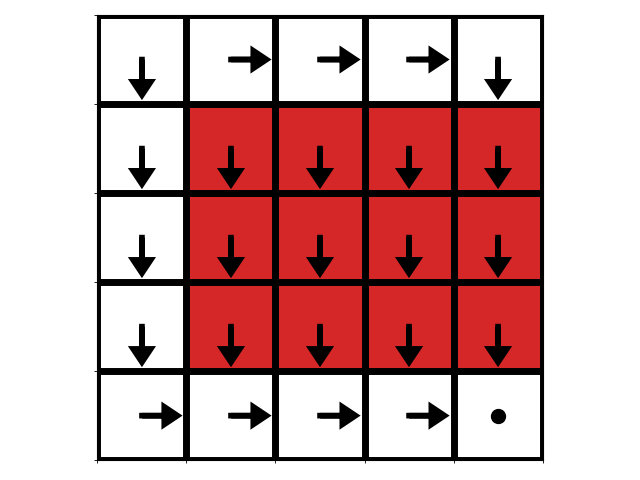

[[1, 1, 1, 1, 1], [1, 2, 2, 2, 2], [1, 2, 2, 2, 2], [1, 2, 2, 2, 2], [1, 1, 1, 1, 1]]
------ Regret Solution ---------
Policy for lambda=0.0 and alpha=0.95
v	<	<	<	<	
v	<	^	v	v	
v	<	v	v	v	
v	v	v	v	v	
>	>	>	>	.	


<IPython.core.display.Javascript object>


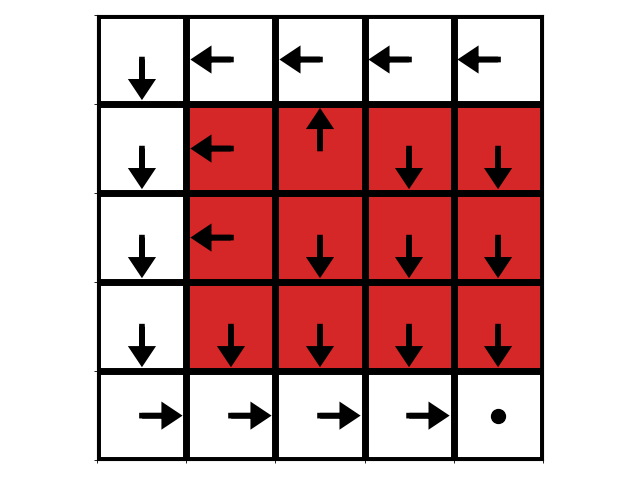

[[1, 1, 1, 1, 1], [1, 2, 2, 2, 2], [1, 2, 2, 2, 2], [1, 2, 2, 2, 2], [1, 1, 1, 1, 1]]

ALPHA 0.95 LAMBDA 0.2
------ Robust Solution ---------
Policy for lambda=0.2 and alpha=0.95
v	>	>	>	v	
v	v	v	v	v	
v	v	v	v	v	
v	v	v	v	v	
>	>	>	>	.	


<IPython.core.display.Javascript object>


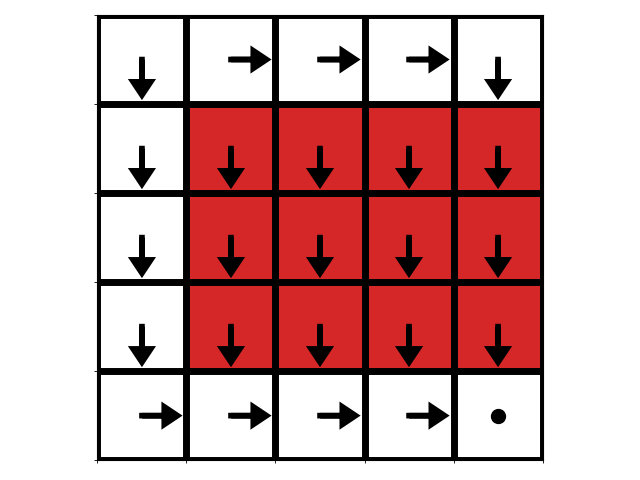

[[1, 1, 1, 1, 1], [1, 2, 2, 2, 2], [1, 2, 2, 2, 2], [1, 2, 2, 2, 2], [1, 1, 1, 1, 1]]
------ Regret Solution ---------
Policy for lambda=0.2 and alpha=0.95
v	<	<	<	<	
v	<	v	v	v	
v	<	v	v	v	
v	v	v	v	v	
>	>	>	>	.	


<IPython.core.display.Javascript object>


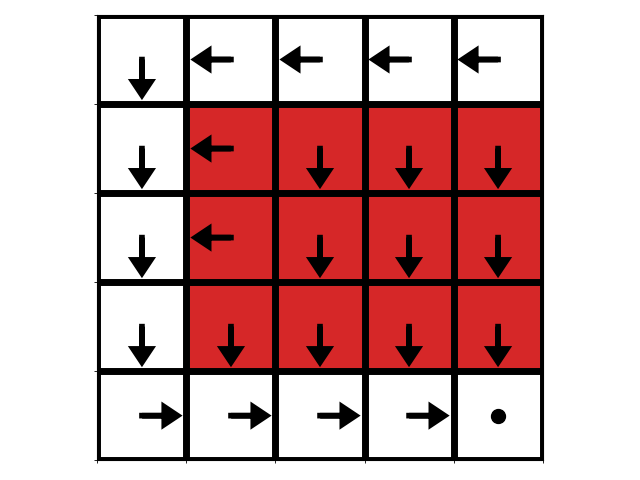

[[1, 1, 1, 1, 1], [1, 2, 2, 2, 2], [1, 2, 2, 2, 2], [1, 2, 2, 2, 2], [1, 1, 1, 1, 1]]

ALPHA 0.95 LAMBDA 0.4
------ Robust Solution ---------
Policy for lambda=0.4 and alpha=0.95
v	>	>	>	v	
v	v	v	v	v	
v	v	v	v	v	
v	v	v	v	v	
>	>	>	>	.	


<IPython.core.display.Javascript object>


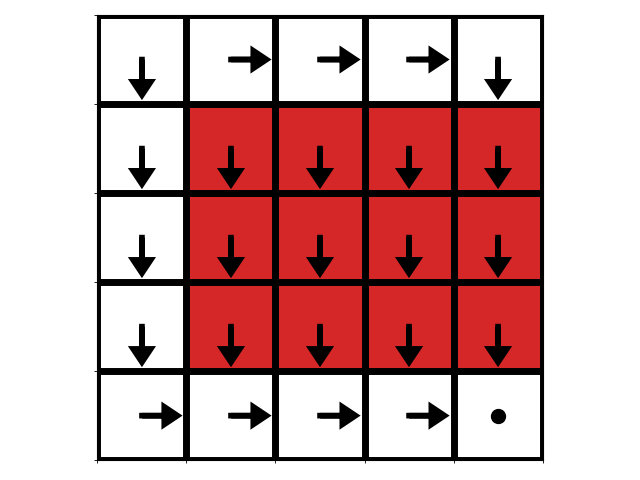

[[1, 1, 1, 1, 1], [1, 2, 2, 2, 2], [1, 2, 2, 2, 2], [1, 2, 2, 2, 2], [1, 1, 1, 1, 1]]
------ Regret Solution ---------
Policy for lambda=0.4 and alpha=0.95
v	<	<	<	v	
v	<	v	v	v	
v	<	v	v	v	
v	v	v	v	v	
>	>	>	>	.	


<IPython.core.display.Javascript object>


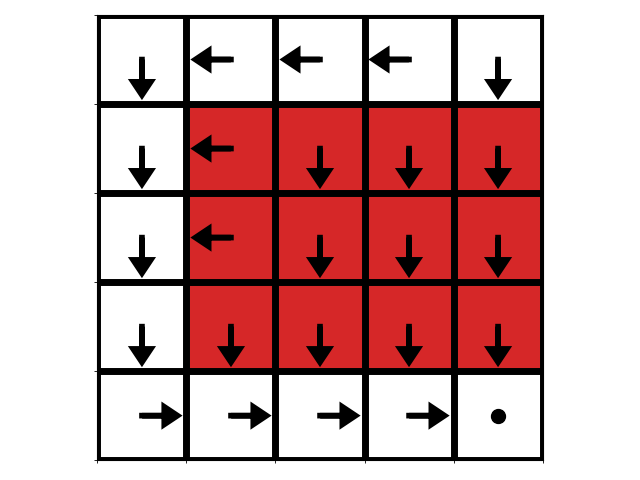

[[1, 1, 1, 1, 1], [1, 2, 2, 2, 2], [1, 2, 2, 2, 2], [1, 2, 2, 2, 2], [1, 1, 1, 1, 1]]

ALPHA 0.95 LAMBDA 0.5
------ Robust Solution ---------
Policy for lambda=0.5 and alpha=0.95
v	>	>	>	v	
v	v	v	v	v	
v	v	v	v	v	
v	v	v	v	v	
>	>	>	>	.	


<IPython.core.display.Javascript object>


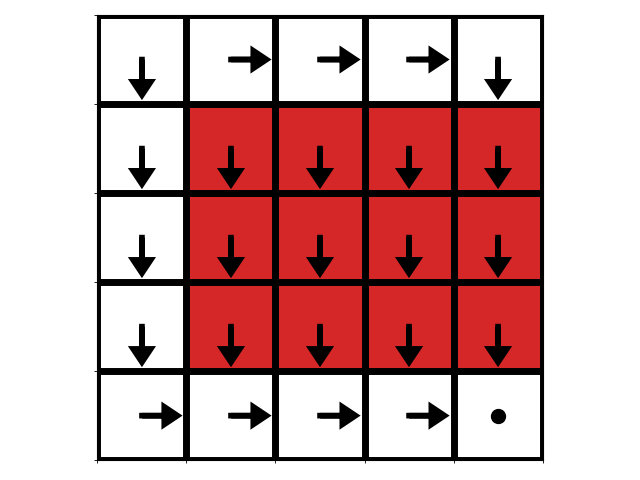

[[1, 1, 1, 1, 1], [1, 2, 2, 2, 2], [1, 2, 2, 2, 2], [1, 2, 2, 2, 2], [1, 1, 1, 1, 1]]
------ Regret Solution ---------
Policy for lambda=0.5 and alpha=0.95
v	<	<	>	v	
v	<	v	v	v	
v	v	v	v	v	
v	v	v	v	v	
>	>	>	>	.	


<IPython.core.display.Javascript object>


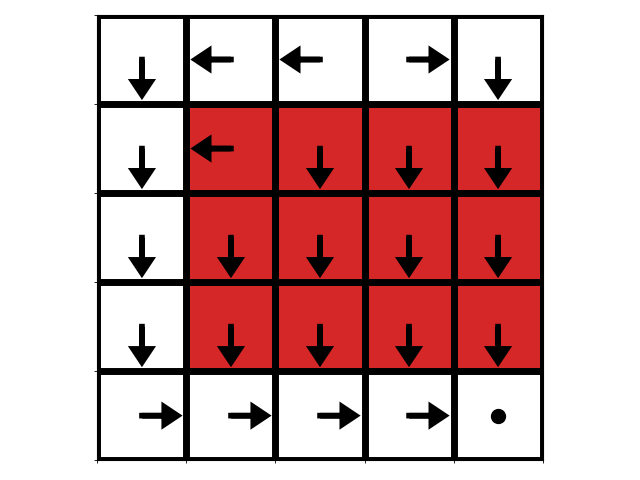

[[1, 1, 1, 1, 1], [1, 2, 2, 2, 2], [1, 2, 2, 2, 2], [1, 2, 2, 2, 2], [1, 1, 1, 1, 1]]

ALPHA 0.95 LAMBDA 0.6
------ Robust Solution ---------
Policy for lambda=0.6 and alpha=0.95
v	>	>	>	v	
v	v	v	v	v	
v	v	v	v	v	
v	v	v	v	v	
>	>	>	>	.	


<IPython.core.display.Javascript object>


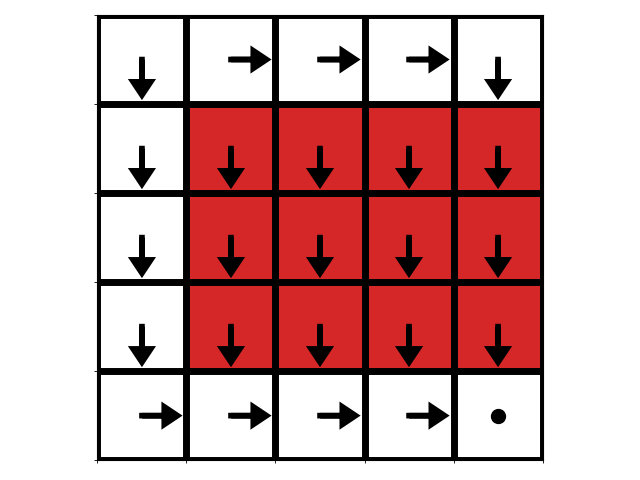

[[1, 1, 1, 1, 1], [1, 2, 2, 2, 2], [1, 2, 2, 2, 2], [1, 2, 2, 2, 2], [1, 1, 1, 1, 1]]
------ Regret Solution ---------
Policy for lambda=0.6 and alpha=0.95
v	<	<	>	v	
v	<	v	v	v	
v	v	v	v	v	
v	v	v	v	v	
>	>	>	>	.	


<IPython.core.display.Javascript object>


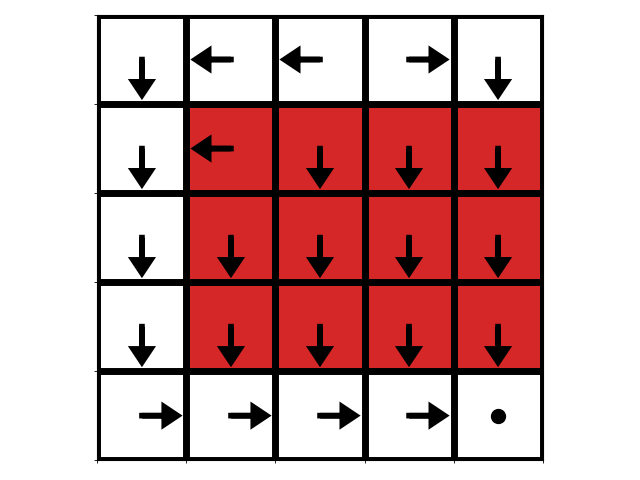

[[1, 1, 1, 1, 1], [1, 2, 2, 2, 2], [1, 2, 2, 2, 2], [1, 2, 2, 2, 2], [1, 1, 1, 1, 1]]

ALPHA 0.95 LAMBDA 0.8
------ Robust Solution ---------
Policy for lambda=0.8 and alpha=0.95
v	>	>	>	v	
v	v	v	v	v	
v	v	v	v	v	
v	v	v	v	v	
>	>	>	>	.	


<IPython.core.display.Javascript object>


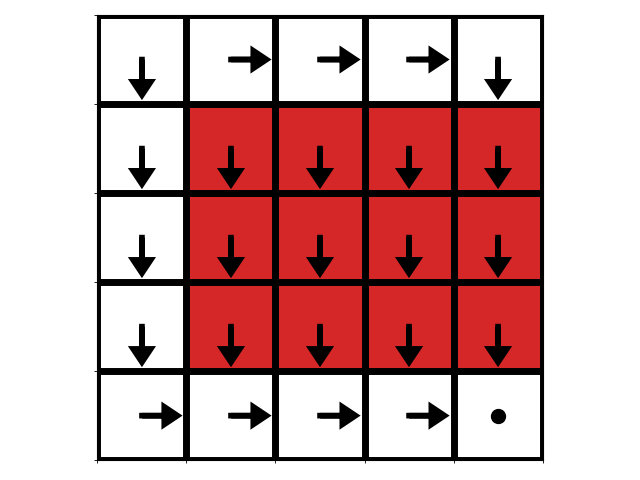

[[1, 1, 1, 1, 1], [1, 2, 2, 2, 2], [1, 2, 2, 2, 2], [1, 2, 2, 2, 2], [1, 1, 1, 1, 1]]
------ Regret Solution ---------
Policy for lambda=0.8 and alpha=0.95
v	<	>	>	v	
v	<	v	v	v	
v	v	v	v	v	
v	v	v	v	v	
>	>	>	>	.	


<IPython.core.display.Javascript object>


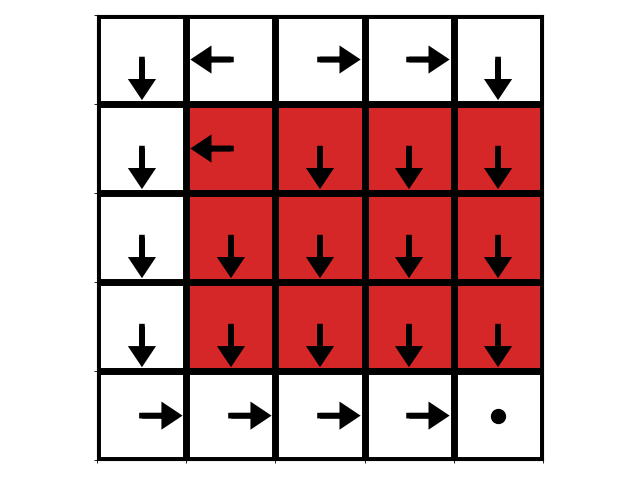

[[1, 1, 1, 1, 1], [1, 2, 2, 2, 2], [1, 2, 2, 2, 2], [1, 2, 2, 2, 2], [1, 1, 1, 1, 1]]
lpal policy
v	<	<	<	<	
v	<	^	^	^	
v	<	v	v	v	
v	v	v	v	v	
>	>	>	>	.	
state 0: < = 0.163, > = 0.092, ^ = 0.163, v = 0.581, 
state 1: < = 0.671, > = 0.120, ^ = 0.209, v = 0.000, 
state 2: < = 0.632, > = 0.139, ^ = 0.230, v = 0.000, 
state 3: < = 0.543, > = 0.193, ^ = 0.264, v = 0.000, 
state 4: < = 0.421, > = 0.290, ^ = 0.290, v = 0.000, 
state 5: < = 0.176, > = 0.000, ^ = 0.103, v = 0.720, 
state 6: < = 0.591, > = 0.000, ^ = 0.409, v = 0.000, 
state 7: < = 0.000, > = 0.000, ^ = 1.000, v = 0.000, 
state 8: < = 0.000, > = 0.000, ^ = 1.000, v = 0.000, 
state 9: < = 0.000, > = 0.000, ^ = 1.000, v = 0.000, 
state 10: < = 0.156, > = 0.000, ^ = 0.091, v = 0.753, 
state 11: < = 1.000, > = 0.000, ^ = 0.000, v = 0.000, 
state 12: < = 0.304, > = 0.000, ^ = 0.191, v = 0.505, 
state 13: < = 0.000, > = 0.000, ^ = 0.209, v = 0.791, 
state 14: < = 0.000, > = 0.000, ^ = 0.199, v = 0.801, 
state 15: < = 0.146, > = 0.000, 

<IPython.core.display.Javascript object>


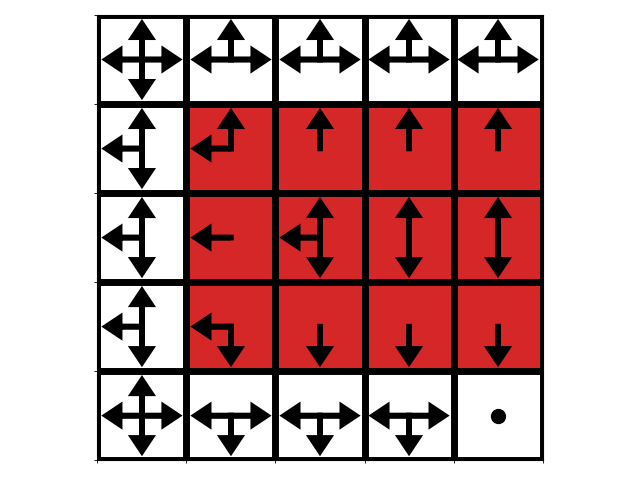

[[1, 1, 1, 1, 1], [1, 2, 2, 2, 2], [1, 2, 2, 2, 2], [1, 2, 2, 2, 2], [1, 1, 1, 1, 1]]


In [12]:
#Now let's see what CVaR optimization does.
lambdas = [0.,0.2,0.4, 0.5,0.6, 0.8]
alpha = 0.95
for lamda in lambdas:
    print()
    print("ALPHA", alpha, "LAMBDA", lamda)

    debug = False
    

    n = r_chain_burned.shape[0]
    posterior_probs = np.ones(n) / n  #uniform dist since samples from MCMC

    
    print("------ Robust Solution ---------")
    u_expert = np.zeros(mdp_env.num_actions * mdp_env.num_states)
    robust_opt_usa, cvar_value, exp_ret = mdp.solve_max_cvar_policy(mdp_env, u_expert, r_chain_burned.transpose(), posterior_probs, alpha, debug, lamda)
    #utils.print_stochastic_policy_action_probs(cvar_opt_usa, mdp_env_A)
    print("Policy for lambda={} and alpha={}".format(lamda, alpha))
    utils.print_policy_from_occupancies(robust_opt_usa, mdp_env)

#     robust_returns = np.sort(np.dot(Rsa, robust_opt_usa))


    pi = utils.get_policy_string_from_occupancies(robust_opt_usa, mdp_env)
    state_feature_list = [tuple(fs) for fs in mdp_env.state_features]
    pg.plot_optimal_policy_lists(pi, state_feature_list, mdp_env.num_rows, mdp_env.num_cols, "./figs/lava_corridor/robust_alpha" + str(alpha) + "lambda" + str(lamda) + ".png")
    
    

    print("------ Regret Solution ---------")
    traj_demonstrations = [demonstrations]
    u_expert = utils.u_sa_from_demos(traj_demonstrations, mdp_env)
    
    regret_opt_usa, cvar_value, exp_ret = mdp.solve_max_cvar_policy(mdp_env, u_expert, r_chain_burned.transpose(), posterior_probs, alpha, debug, lamda)
    #utils.print_stochastic_policy_action_probs(cvar_opt_usa, mdp_env_A)
    print("Policy for lambda={} and alpha={}".format(lamda, alpha))
    utils.print_policy_from_occupancies(regret_opt_usa, mdp_env)

#     regret_returns = np.sort(np.dot(Rsa, regret_opt_usa))

    pi = utils.get_policy_string_from_occupancies(regret_opt_usa, mdp_env)
    state_feature_list = [tuple(fs) for fs in mdp_env.state_features]
    pg.plot_optimal_policy_lists(pi, state_feature_list, mdp_env.num_rows, mdp_env.num_cols, "./figs/lava_corridor/regret_alpha" + str(alpha) + "lambda" + str(lamda) + ".png")


#LPAL solution
u_expert = utils.u_sa_from_demos(traj_demonstrations, mdp_env)
lpal_usa = mdp.solve_lpal_policy(mdp_env, u_expert)
#utils.print_stochastic_policy_action_probs(cvar_opt_usa, mdp_env_A)
print("lpal policy")
utils.print_policy_from_occupancies(lpal_usa, mdp_env)
utils.print_stochastic_policy_action_probs(lpal_usa, mdp_env)
pi = utils.get_policy_string_from_occupancies(lpal_usa, mdp_env)
state_feature_list = [tuple(fs) for fs in mdp_env.state_features]
pg.plot_optimal_policy_lists(pi, state_feature_list, mdp_env.num_rows, mdp_env.num_cols, "./figs/lava_corridor/lpal.png")

--------epoch 0 ---------
[0.97577543 1.02545876 1.09927567 1.16731959 1.2015116  1.02545876
 1.05670534 1.10126607 1.11776738 1.11272711 1.09927567 1.10126607
 1.06682832 0.98208561 0.86909691 1.16731959 1.11776738 0.98208561
 0.71724388 0.41521481 1.2015116  1.11272711 0.86909691 0.41521481
 0.04       0.04      ]
grad [ -3.3999455 -11.6400545]
r [-0.28037462 -0.95989066]
--------epoch 1 ---------
[0.19691545 0.14115641 0.09798677 0.05351918 0.04657013 0.27059838
 0.04079023 0.04000594 0.04070163 0.07110673 0.34813472 0.04005596
 0.07650714 0.08072605 0.11119305 0.39142697 0.0479712  0.11647864
 0.12076751 0.1513216  0.46429122 0.5286807  0.69636735 0.86445549
 1.         0.99999999]
grad [ 3.89989723 -0.93762567]
r [-0.2416488  -0.97036378]
--------epoch 2 ---------
[0.28661453 0.21304038 0.16747568 0.09082421 0.04979912 0.34923621
 0.04176694 0.04000226 0.04002341 0.0408563  0.43563199 0.040035
 0.04949505 0.07887249 0.08089376 0.48148944 0.04242243 0.08948969
 0.11888442 0.1209690

<IPython.core.display.Javascript object>


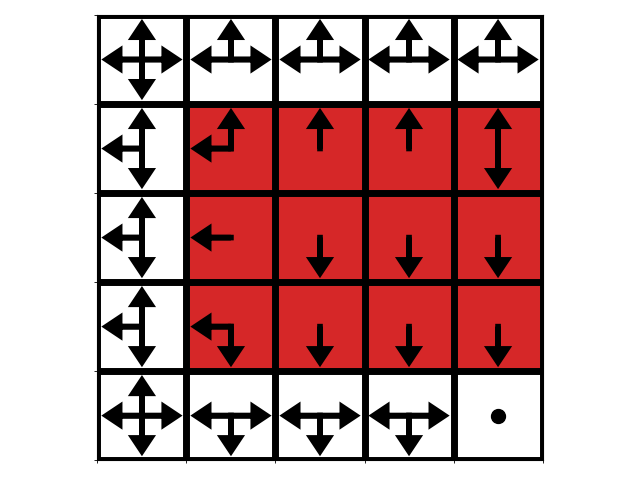

[[1, 1, 1, 1, 1], [1, 2, 2, 2, 2], [1, 2, 2, 2, 2], [1, 2, 2, 2, 2], [1, 1, 1, 1, 1]]


In [14]:
import maxent
#just keep states in traj_demos
maxent_demos = []
for d in traj_demonstrations:
    #add only states to demos
    demo = []
    for s,a in d:
        demo.append(s)
    maxent_demos.append(demo)
maxent_usa, r_weights, maxent_pi = maxent.calc_max_ent_u_sa(mdp_env, maxent_demos)
print("max ent policy")
utils.print_policy_from_occupancies(maxent_usa, mdp_env)
utils.print_stochastic_policy_action_probs(maxent_usa, mdp_env)
pi = utils.get_policy_string_from_occupancies(maxent_usa, mdp_env)
state_feature_list = [tuple(fs) for fs in mdp_env.state_features]
pg.plot_optimal_policy_lists(pi, state_feature_list, mdp_env.num_rows, mdp_env.num_cols, "./figs/lava_corridor/maxent.png")

In [15]:
#Now let's see what CVaR optimization does.
lambdas = [0.]
alpha = 0.95
for lamda in lambdas:
    print()
    print("ALPHA", alpha, "LAMBDA", lamda)

    debug = False
    

    n = r_chain_burned.shape[0]
    posterior_probs = np.ones(n) / n  #uniform dist since samples from MCMC

    
    print("------ Robust Solution ---------")
    u_expert = np.zeros(mdp_env.num_actions * mdp_env.num_states)
    robust_opt_usa, cvar_value, exp_ret = mdp.solve_max_cvar_policy(mdp_env, u_expert, r_chain_burned.transpose(), posterior_probs, alpha, debug, lamda)
    #utils.print_stochastic_policy_action_probs(cvar_opt_usa, mdp_env_A)
    print("Policy for lambda={} and alpha={}".format(lamda, alpha))
    utils.print_policy_from_occupancies(robust_opt_usa, mdp_env)

    robust_returns = np.sort(np.dot(Rsa, robust_opt_usa))


    # pi = utils.get_policy_string_from_occupancies(robust_opt_usa, mdp_env)
    # state_feature_list = [tuple(fs) for fs in mdp_env.state_features]
    # pg.plot_optimal_policy_lists(pi, state_feature_list, mdp_env.num_rows, mdp_env.num_cols, "./figs/lava_corridor/robust_alpha" + str(alpha) + "lambda" + str(lamda) + ".png")
    
    

    print("------ Regret Solution ---------")
    traj_demonstrations = [demonstrations]
    u_expert = utils.u_sa_from_demos(traj_demonstrations, mdp_env)
    
    regret_opt_usa, cvar_value, exp_ret = mdp.solve_max_cvar_policy(mdp_env, u_expert, r_chain_burned.transpose(), posterior_probs, alpha, debug, lamda)
    #utils.print_stochastic_policy_action_probs(cvar_opt_usa, mdp_env_A)
    print("Policy for lambda={} and alpha={}".format(lamda, alpha))
    utils.print_policy_from_occupancies(regret_opt_usa, mdp_env)

    regret_returns = np.sort(np.dot(Rsa, regret_opt_usa))

    # pi = utils.get_policy_string_from_occupancies(regret_opt_usa, mdp_env)
    # state_feature_list = [tuple(fs) for fs in mdp_env.state_features]
    # pg.plot_optimal_policy_lists(pi, state_feature_list, mdp_env.num_rows, mdp_env.num_cols, "./figs/lava_corridor/regret_alpha" + str(alpha) + "lambda" + str(lamda) + ".png")
    
# print("-------- IRD Solution -------")
# u_expert = utils.u_sa_from_demos(traj_demonstrations, mdp_env)#mdp_env.state_features[init_demo_state]#np.zeros(mdp_env.get_reward_dimensionality())#
# ird_w = utils.get_worst_case_feature_weights_binary_ird(r_chain_burned, u_expert, mdp_env)
# ird_r = np.dot(mdp_env.state_features, ird_w)
# ird_r_sa = mdp_env.transform_to_R_sa(ird_w)
# ird_u_sa = mdp.solve_mdp_lp(mdp_env, reward_sa=ird_r_sa) #use optional argument to replace standard rewards with sample
# print('ird reward')
# utils.print_as_grid(ird_r, mdp_env)
# print("ird policy")
# utils.print_policy_from_occupancies(ird_u_sa, mdp_env)


ALPHA 0.95 LAMBDA 0.0
------ Robust Solution ---------
Policy for lambda=0.0 and alpha=0.95
v	>	>	>	v	
v	v	v	v	v	
v	v	v	v	v	
v	v	v	v	v	
>	>	>	>	.	
------ Regret Solution ---------
Policy for lambda=0.0 and alpha=0.95
v	<	<	<	<	
v	<	^	v	v	
v	<	v	v	v	
v	v	v	v	v	
>	>	>	>	.	


In [16]:
lpal_returns = np.sort(np.dot(Rsa, lpal_usa))
maxent_returns = np.sort(np.dot(Rsa, maxent_usa))
mean_returns = np.sort(np.dot(Rsa, mean_u_sa))

<IPython.core.display.Javascript object>


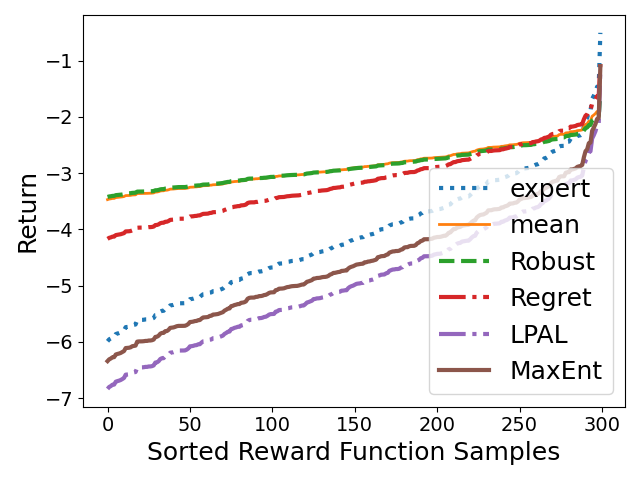

In [17]:
plt.figure(20)
plt.clf()
plt.plot(expert_returns, ':',label='expert',linewidth=3)
plt.plot(mean_returns,'-', label='mean',linewidth=2)
#plt.plot(map_returns, label='MAP')
plt.plot(robust_returns,'--', label='Robust',linewidth=3)
plt.plot(regret_returns, '-.',label='Regret',linewidth=3)
#plt.plot(mean_returns,':',label="BIRL", linewidth=3)
plt.plot(lpal_returns,'-.',label="LPAL", linewidth=3)
plt.plot(maxent_returns,'-',label="MaxEnt", linewidth=3)
plt.legend(fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel("Return", fontsize=18)
plt.xlabel("Sorted Reward Function Samples", fontsize=18)
# plt.show()
plt.tight_layout()
plt.savefig("./figs/lava_corridor/robust_vs_baseline.png")